In [1]:
!pip install numpy opencv-python onnxruntime

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: celery 5.0.5 has a non-standard dependency specifier pytz>dev. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
import cv2
import helper
model_path = "signDet.onnx"
yolov7_detector = helper.YOLOv8(model_path, conf_thres=0.45, iou_thres=0.7, padding_percent=2, filter_boxes_by_area=1, half=True)

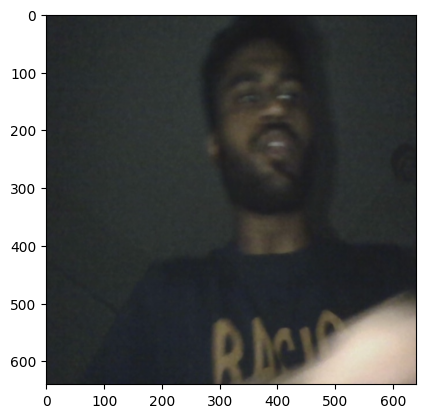

In [4]:
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    yolov7_detector(frame)
    frame = yolov7_detector.draw_detections(frame)
    # Display the resulting frame
    cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()